Categorical Columns: ['Application_ID', 'Name', 'Gender', 'Marital_Status', 'Education', 'Employment_Type', 'Loan_Purpose', 'Loan_Status', 'Application_Date']
Continuous Columns: ['Age', 'Annual_Income', 'Loan_Amount', 'Credit_Score', 'Loan_Term_Months']


<Figure size 1000x800 with 0 Axes>

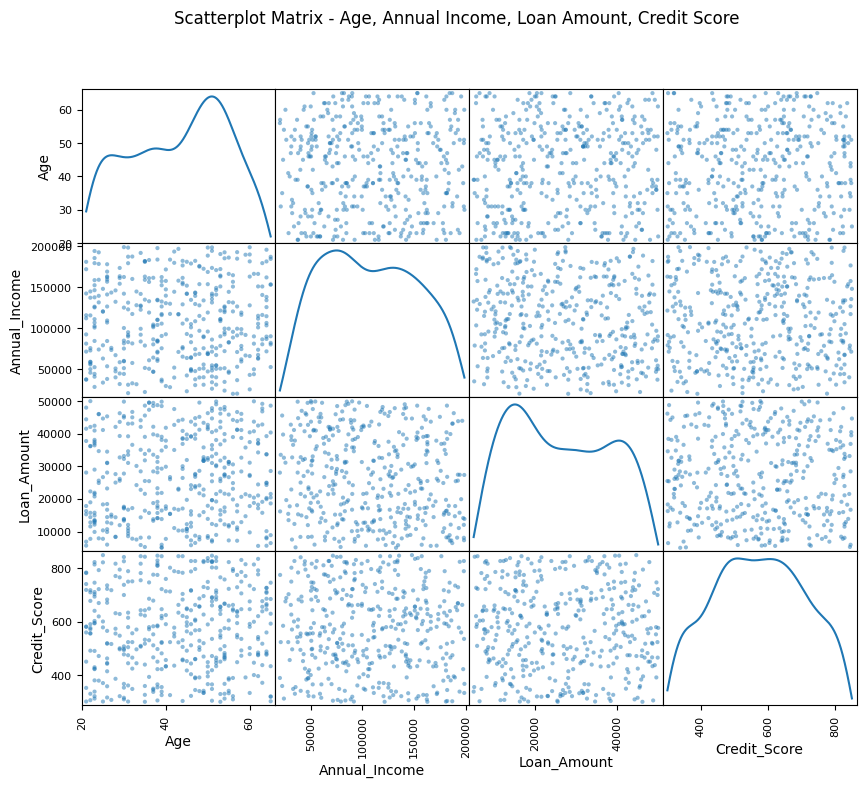

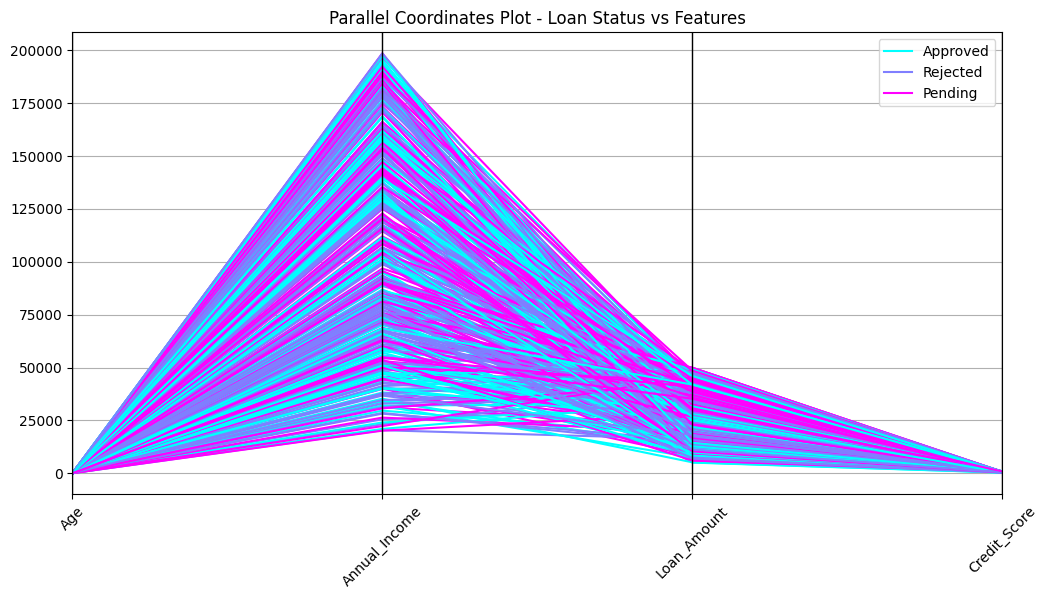

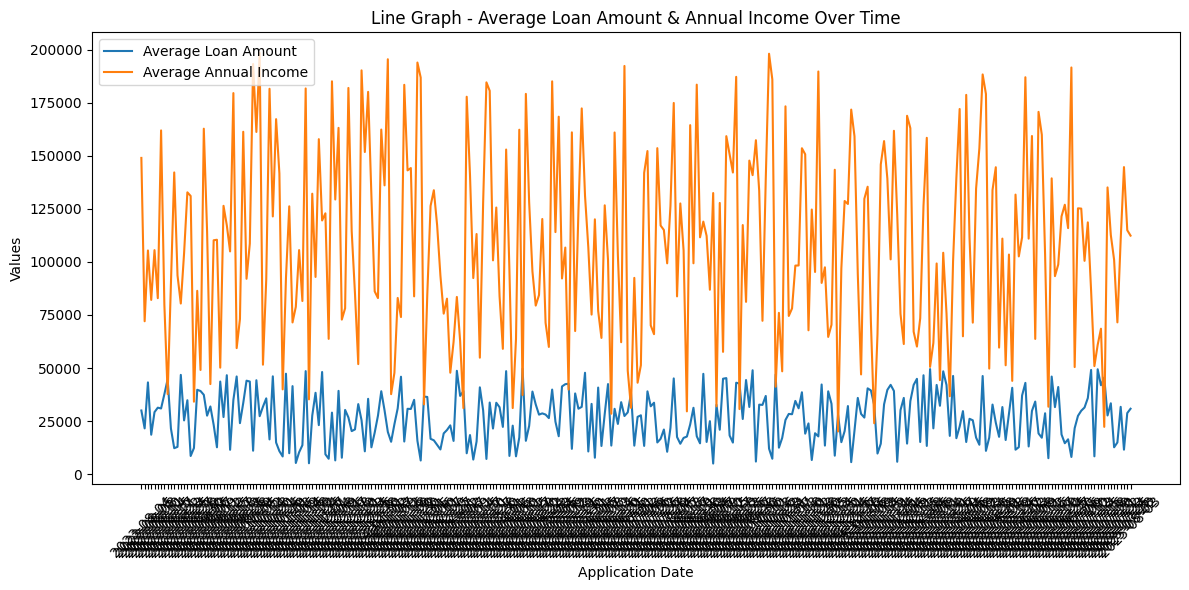

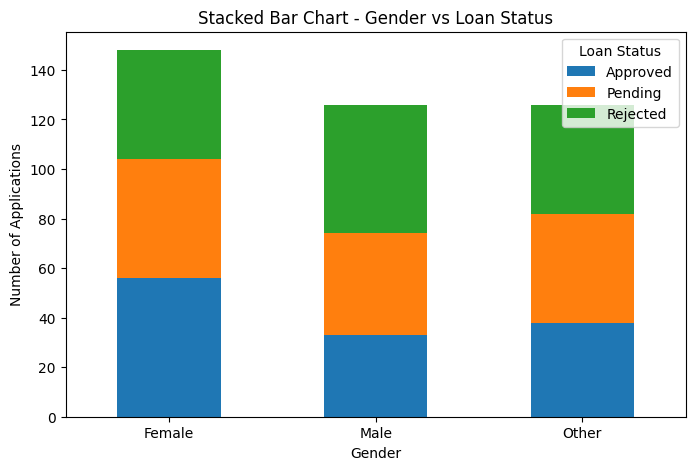

In [ ]:








































# -----------------------------------------
# Install Required Libraries (if not already installed)
# -----------------------------------------
!pip install pandas matplotlib seaborn joypy --quiet

# -----------------------------------------
# Import Libraries
# -----------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix, parallel_coordinates

# -----------------------------------------
# Load Dataset (Change Path if Necessary)
# -----------------------------------------
df = pd.read_csv("/content/banking_loan_applications.csv")

# -----------------------------------------
# Identify Categorical and Continuous Columns
# -----------------------------------------
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

# -----------------------------------------
# 1. SCATTERPLOT MATRIX (Continuous Variables)
# -----------------------------------------
plt.figure(figsize=(10, 8))
scatter_matrix(df[["Age", "Annual_Income", "Loan_Amount", "Credit_Score"]], figsize=(10, 8), diagonal='kde')
plt.suptitle("Scatterplot Matrix - Age, Annual Income, Loan Amount, Credit Score")
plt.show()

# -----------------------------------------
# 2. PARALLEL COORDINATES (Continuous + Categorical)
# -----------------------------------------
plt.figure(figsize=(12, 6))
parallel_coordinates(df[["Loan_Status", "Age", "Annual_Income", "Loan_Amount", "Credit_Score"]], class_column="Loan_Status", colormap='cool')
plt.title("Parallel Coordinates Plot - Loan Status vs Features")
plt.xticks(rotation=45)
plt.show()

# -----------------------------------------
# 3. LINE GRAPH (Multiple Measures Over Time)
# -----------------------------------------
df_time = df.groupby("Application_Date")[["Loan_Amount", "Annual_Income"]].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_time["Application_Date"], df_time["Loan_Amount"], label="Average Loan Amount")
plt.plot(df_time["Application_Date"], df_time["Annual_Income"], label="Average Annual Income")
plt.title("Line Graph - Average Loan Amount & Annual Income Over Time")
plt.xlabel("Application Date")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------
# 4. STACKED BAR CHART (Multiple Categorical Variables)
# -----------------------------------------
stacked_data = df.groupby(["Gender", "Loan_Status"]).size().unstack()

stacked_data.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Stacked Bar Chart - Gender vs Loan Status")
plt.ylabel("Number of Applications")
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()
